<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Implementation" data-toc-modified-id="Implementation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#Experiment" data-toc-modified-id="Experiment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment</a></span><ul class="toc-item"><li><span><a href="#Binary-classification" data-toc-modified-id="Binary-classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Binary classification</a></span><ul class="toc-item"><li><span><a href="#Data-generation" data-toc-modified-id="Data-generation-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Data generation</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li><li><span><a href="#Multi-class-classification" data-toc-modified-id="Multi-class-classification-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multi-class classification</a></span><ul class="toc-item"><li><span><a href="#Three-classes" data-toc-modified-id="Three-classes-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Three classes</a></span></li><li><span><a href="#Switch-problem" data-toc-modified-id="Switch-problem-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Switch problem</a></span></li><li><span><a href="#Four-classes-problem" data-toc-modified-id="Four-classes-problem-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Four classes problem</a></span></li><li><span><a href="#Xor-problem" data-toc-modified-id="Xor-problem-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Xor problem</a></span></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Discussion</a></span><ul class="toc-item"><li><span><a href="#sigmoid-and-softmax-comparison-in-2-classes-probelm" data-toc-modified-id="sigmoid-and-softmax-comparison-in-2-classes-probelm-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>sigmoid and softmax comparison in 2 classes probelm</a></span></li><li><span><a href="#Gradient-decent-coef-property" data-toc-modified-id="Gradient-decent-coef-property-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Gradient decent coef property</a></span></li></ul></li></ul></li><li><span><a href="#Benchmark-and-test" data-toc-modified-id="Benchmark-and-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Benchmark and test</a></span><ul class="toc-item"><li><span><a href="#Test" data-toc-modified-id="Test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test</a></span><ul class="toc-item"><li><span><a href="#sigmoid" data-toc-modified-id="sigmoid-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>sigmoid</a></span></li><li><span><a href="#softmax" data-toc-modified-id="softmax-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>softmax</a></span></li><li><span><a href="#Solver" data-toc-modified-id="Solver-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Solver</a></span></li></ul></li><li><span><a href="#benchmark" data-toc-modified-id="benchmark-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>benchmark</a></span><ul class="toc-item"><li><span><a href="#Tensor-production" data-toc-modified-id="Tensor-production-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Tensor production</a></span></li><li><span><a href="#sigmoid-and-softmax-for-binary-problem" data-toc-modified-id="sigmoid-and-softmax-for-binary-problem-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>sigmoid and softmax for binary problem</a></span></li></ul></li><li><span><a href="#Enable-numba" data-toc-modified-id="Enable-numba-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Enable <code>numba</code></a></span></li></ul></li></ul></div>

# Logistic Regression

## Implementation

In [1]:
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(np.negative(z)))

def optimize_wb_sigmoid_BFGS(w,X,y,learning_rate,lambda_,tol):

    ##### init B^{-1}
    B_inv= learning_rate*np.eye(X.shape[1])
    
    ##### init g
    z=X.dot(w.reshape(-1))
    h=1/(1+np.exp(np.negative(z)))
    a=h-y    
    g=a.dot(X)/a.shape[0]
    rg=lambda_*w.reshape(-1)
    rg[rg.shape[0]-1]=0
    g+=rg
    
    while True:
                
        # p_k = B_k^{-1} -g_k
        p=B_inv.dot(-g)
        
        # alpha_k = ???
        alpha=1
        
        # s_k = alpha_k p_k
        s=alpha*p
                
        # w_k = w_k + s_k
        w += s
        
        ##### calculate g
        last_g = g
        z=X.dot(w.reshape(-1))
        h=1/(1+np.exp(np.negative(z)))
        a=h-y    
        g=a.dot(X)/a.shape[0]
        rg=lambda_*w.reshape(-1)
        rg[rg.shape[0]-1]=0
        g+=rg

        
        ##### calculate B^-1
        # y_k = g_{k+1} - g_k
        y_ = g - last_g
        # C  = B_k^{-1}
        # C' = B_{k+1}^{-1}
        # y  = y_k
        # s  = s_k
        # C' = C
        #     + (<s,y>+<y,Cy>)/<s,y>^2  (s s^T)
        #     - 1/<s,y>      ((Cy)s^T+s(Cy)^T)
        C=B_inv
        Cy=np.dot(C,y_)
        yCy=np.dot(y_,Cy)
        sy=np.dot(s,y_)        
        B_inv=C\
            + (sy+yCy)/np.square(sy) * np.dot(s.reshape(-1,1), s.reshape(1,-1))\
            - (np.dot(Cy.reshape(-1,1), s.reshape(1,-1)) + np.dot(s.reshape(-1,1), Cy.reshape(1,-1))) / sy

        
        if np.sqrt(g.dot(g))/X.shape[1] < tol:
            break

def optimize_wb_sigmoid(w,b,X,y,learning_rate,lambda_,tol):
    while True:
        z=X.dot(w.reshape(-1)) + b
        h=1/(1+np.exp(np.negative(z)))
        a=h-y    
        g=a.dot(X)/a.shape[0]
        g+=lambda_*w.reshape(-1)
        gb=a.mean()
        w += -learning_rate*g
        b += -learning_rate*gb
        if np.sqrt(g.dot(g) + gb*gb)/(X.shape[1]+1) < tol:
            break

def softmax(z):
    maxz=np.amax(z,axis=1,keepdims=True)
    z=z-maxz
    expz=np.exp(z)
    norm=np.sum(expz, axis=1, keepdims=True)
    return expz/norm

def update_wb_softmax(w,b,X,yonehot,learning_rate,lambda_,tol):
    # b[nlabel]
    # w[nlabel,nfeature]
    # yonehot[ndata,nlabel]
    
    # z[ndata,nlabel]

    #z=np.tensordot(X,w, axes=(1,1)) + b
    z=np.dot(X, w.T) + b
    
    # h[ndata,nlabel]
    h=softmax(z)
    # a[ndata,nlabel]
    a=h-yonehot
    # X[ndata,nfeature]
    # a[ndata,nlabel]  
    # g[nlabel,nfeature]    
    
    #g=np.tensordot(a, X, axes=(0,0))/a.shape[0]
    g=a.T.dot(X)/a.shape[0]
    
    g+=lambda_*w
    #print(g.shape)
    #print(w.shape)
    # gb[nlabel]
    gb=a.mean(axis=0)                
    w += -learning_rate*g
    b += -learning_rate*gb
    
    #if np.sqrt(np.tensordot(g, g, axes=((0,1),(0,1))) + gb.dot(gb))/(X.shape[1]+1) < tol:
    if np.sqrt(np.tensordot(g, g, axes=((0,1),(0,1))) + gb.dot(gb))/(X.shape[1]+1) < tol:
        return False
    return True

        
class LogisticRegression:
    
    def __init__(self,C=10,tol=1E-5,learning_rate=0.1,random_state=910715,\
                 multi_class='auto', solver=None, use_numba=False):
        '''
        multi_class: string
            ovr:  sigmoid for binary labels
                  failed for multi(>2) labels
            multinomial: softmax for binary or multi(>2) labels
            auto: sigmoid for binary labels
                  softmax for multi(>2) labels
        C: floating
            l2 regularization = 1/C
        learning_rate: floating
            learning_rate for gradient descent
        random_state: integer
            seed for internal random generator
        tol: floating
            stop criterior for gradient
        solver: string
            'gradient descent': support softmax and sigmoid
            'BFGS': support sigmoid
            sigmoid default: 'BFGS'
            softmax default: 'gradient descent'
        '''
        self.C=C
        self.tol=tol
        self.rnd = np.random.RandomState(random_state)
        self.learning_rate=learning_rate
        self.multi_class=multi_class        
        
        self.update_wb_softmax=update_wb_softmax
        self.solver=solver
        
        if use_numba:
                        
            import numba as nb
            # create jit function for update_wb_sigmoid
            # and save it as class attr
            if not hasattr(LogisticRegression, "optimize_wb_sigmoid_BFGS_jit"):
                LogisticRegression.optimize_wb_sigmoid_BFGS_jit=nb.jit(nopython=True)(optimize_wb_sigmoid_BFGS)
            self.optimize_wb_sigmoid_BFGS=LogisticRegression.optimize_wb_sigmoid_BFGS_jit
            if not hasattr(LogisticRegression, "optimize_wb_sigmoid_jit"):
                LogisticRegression.optimize_wb_sigmoid_jit=nb.jit(nopython=True)(optimize_wb_sigmoid)
            self.optimize_wb_sigmoid=LogisticRegression.optimize_wb_sigmoid_jit
            
        else:
            self.optimize_wb_sigmoid_BFGS=optimize_wb_sigmoid_BFGS
            self.optimize_wb_sigmoid=optimize_wb_sigmoid

        
    def map_label(self,y):
        ydict=set(y)
        labels=list(ydict)
        labels.sort()
        
        if len(labels) == 2:
            self.binary=True
        else:
            self.binary=False
        
        labels_index={}
        for i,v in enumerate(labels):
            labels_index[v]=i
            
        yb=np.zeros(X.shape[0], dtype=np.int_)        
        for i in range(y.shape[0]):
            yb[i]=labels_index[y[i]]
        
        return yb,labels,labels_index
        
            
                    
    def train(self):
        b=self.b
        w=self.w
        y=self.y
        X=self.X
        learning_rate=self.learning_rate
        lambda_=1/self.C
        tol=self.tol
        
        nlabel=len(self.labels)
        
        if self.binary:
            
            if self.solver is None or self.solver == "BFGS":
                x1=np.ones((X.shape[0],1))
                Xadd1=np.hstack((X,x1))
                w=np.zeros(X.shape[1]+1)
                self.optimize_wb_sigmoid_BFGS(w=w,X=Xadd1,y=y,\
                    learning_rate=learning_rate,lambda_=lambda_,tol=tol)
                self.w[:]=w[0:X.shape[1]]
                self.b[0]=w[X.shape[1]]
            elif self.solver == "gradient descent":
                self.optimize_wb_sigmoid(w=w,b=b,X=X,y=y,\
                    learning_rate=learning_rate,lambda_=lambda_,tol=tol)
            else:
                raise Exception("what method?")
                                            
        else:
            if self.solver is None or self.solver == "gradient descent":
                yonehot=np.zeros((X.shape[0], nlabel))
                yonehot[np.arange(X.shape[0]), y] = 1
                while self.update_wb_softmax(\
                    w=w,b=b,X=X,yonehot=yonehot,learning_rate=learning_rate,\
                    lambda_=lambda_,tol=tol):
                    pass           
            else:
                raise Exception("what method?")
                
                                
    
    def fit(self, X, y):
        assert X.ndim == 2, X.shape
        assert y.ndim == 1, y.shape
        assert X.shape[0] == y.shape[0], "X:" + str(X.shape[0]) +"y:" + str(y.shape[0])
        
                
        y,labels,labels_index=self.map_label(y)
        self.labels=labels
        self.labels_index=labels_index
        self.X=X
        self.y=y
        nfeature=X.shape[1]
        nlabel=len(labels)
        
        if len(labels)==2:
            if self.multi_class == 'auto' or self.multi_class == 'ovr':
                self.w=np.zeros((1,X.shape[1]))
                self.b=np.zeros((1,))
                self.binary=True
            elif self.multi_class == 'multinomial':
                self.w=np.zeros((nlabel,X.shape[1]))
                self.b=np.zeros((nlabel,))
                self.binary=False
                
        else:
            if self.multi_class == 'auto' or self.multi_class == 'multinomial':
                self.binary=False
                self.w=np.zeros((nlabel,X.shape[1]))
                self.b=np.zeros((nlabel,))
            else:
                raise Exception("not implement binary classification for multi labels")
                    
        self.train()
        
        
        self.intercept_=self.b
        self.coef_=self.w
        return self
        
    def predict(self, X):
        assert X.ndim == 2, X.shape
        w=self.w
        b=self.b
        
        if self.binary:
            w=w.reshape(-1)
            z=X.dot(w) + b
            h=sigmoid(z)
            yhat_ori = h > 0.5
            yhat=np.zeros(X.shape[0])
            for i,v in enumerate(yhat_ori):
                yhat[i] = self.labels_index[v]                
        else:
            
            # z[ndata,nlabel]
            z=np.tensordot(X,w, axes=(1,1)) + b
            # h[ndata,nlabel]
            h=softmax(z)
            yhat_ori=np.argmax(h,axis=1)
            yhat=np.zeros(X.shape[0])
            for i,v in enumerate(yhat_ori):
                yhat[i] = self.labels_index[v]                
            
        
        return yhat


# Experiment

## Binary classification

### Data generation

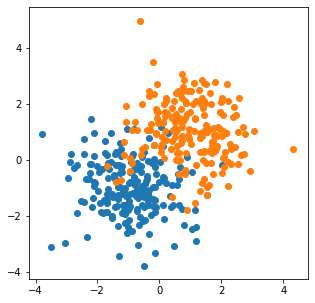

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def gen_data(center,n=200,random_state=1):
    rnd=np.random.RandomState(random_state)

    if isinstance(n, int):        
        Xs=[rnd.randn(n,2) + c for c in center]
        ys=[np.full(n, i) for i in range(len(center))]
    else:
        assert len(n) == len(center), n
        Xs=[rnd.randn(n_,2) + c for c,n_ in zip(center,n)]
        ys=[np.full(n_, i) for i,n_ in enumerate(n)]
        
    X=np.vstack(Xs)
    y=np.hstack(ys)
    pert=np.random.permutation(X.shape[0])
    X=X[pert]
    y=y[pert]
    
    return X,y

def plot_data(X, y):
    plt.figure(figsize=(5,5))
    nlabels=int(np.amax(y)+1)
    for i in range(nlabels):        
        plt.scatter(X[y==i,0], X[y==i,1])
        
    plt.show()

X,y=gen_data([[-1,-1],[1,1]])
plot_data(X, y)

### Regression

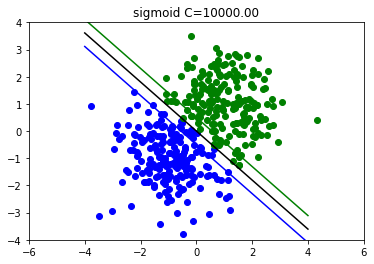

In [3]:
def plot(lr):
    
    X,y=gen_data([[-1,-1],[1,1]])
    lr.fit(X,y)
    yhat=lr.predict(X)

    plt.figure()
    plt.scatter(X[yhat==0,0], X[yhat==0,1],color="blue")
    plt.scatter(X[yhat==1,0], X[yhat==1,1],color="green")
    x_plt=np.linspace(-4,4,10)
    y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0])/(-lr.coef_[0,1])
    plt.plot(x_plt, y_plt, color="black")

    if lr.binary:
        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0] + 1)/(-lr.coef_[0,1])
        plt.plot(x_plt, y_plt,"blue")

        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0] - 1)/(-lr.coef_[0,1])
        plt.plot(x_plt, y_plt,"green")
    else:
        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*(lr.coef_[0,0]-lr.coef_[1,0])+(lr.intercept_[0]-lr.intercept_[1]) + 1)/(-lr.coef_[0,1]+lr.coef_[1,1])
        plt.plot(x_plt, y_plt,"blue")

        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*(lr.coef_[0,0]-lr.coef_[1,0])+(lr.intercept_[0]-lr.intercept_[1]) - 1)/(-lr.coef_[0,1]+lr.coef_[1,1])
        plt.plot(x_plt, y_plt,"green")
        
    
    if lr.binary:
        plt.title(("sigmoid C=%.2f"%lr.C))
    else:
        plt.title(("softmax C=%.2f"%lr.C))
        
    plt.xlim(-6,6)
    plt.ylim(-4,4)
    plt.show()

    #print(lr.coef_)
    #print(lr.intercept_)


plot(LogisticRegression(C=10000))

### Accuracy

accuracy: 0.9325


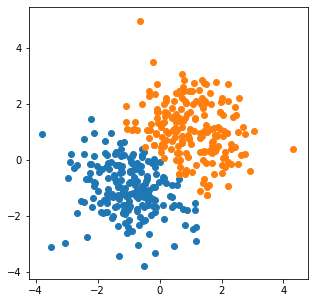

In [4]:
np.random.seed(0)

X,y=gen_data([[-1,-1],[1,1]],n=200)
nbs=LogisticRegression()
nbs.fit(X, y)
  
X,y=gen_data([[-1,-1],[1,1]],n=200)
yhat=nbs.predict(X) 

print("accuracy:",np.sum(yhat==y)/y.shape[0])
plot_data(X, yhat)

## Multi-class classification

### Three classes

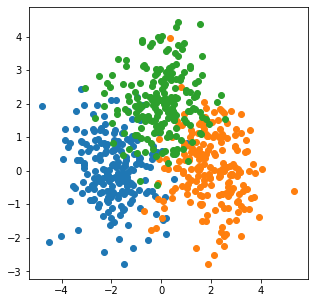

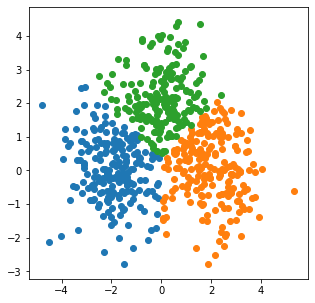

In [5]:
X,y=gen_data([[-2,0],[2,0],[0,2]])
plot_data(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_data(X, yhat)

### Switch problem

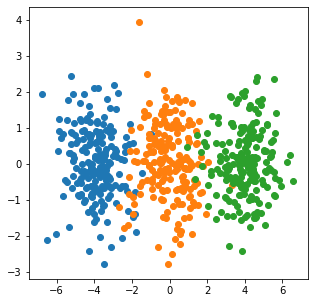

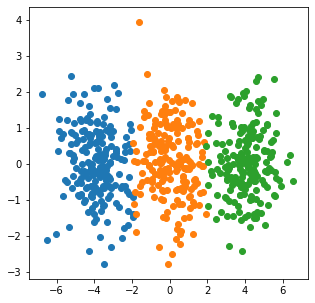

In [6]:
X,y=gen_data([[-4,0],[0,0],[4,0]])
plot_data(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_data(X, yhat)

### Four classes problem

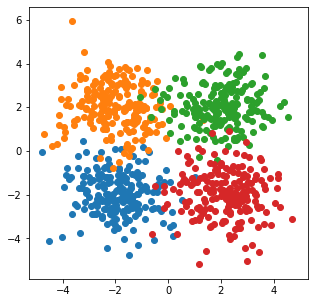

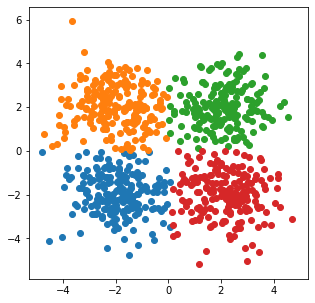

In [7]:
X,y=gen_data([[-2,-2],[-2,2],[2,2],[2,-2]])
plot_data(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_data(X, yhat)

### Xor problem


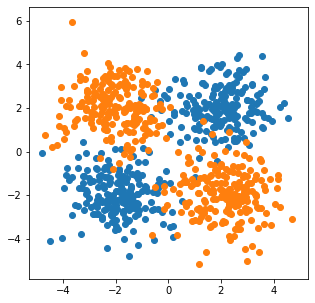

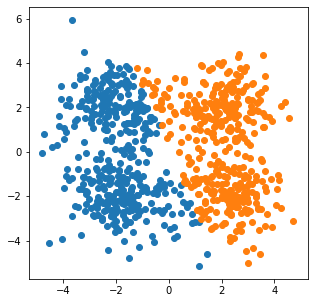

In [8]:
X,y=gen_data([[-2,-2],[-2,2],[2,2],[2,-2]])
y[y==2]=0
y[y==3]=1
plot_data(X, y)


lr=LogisticRegression()
lr.fit(X,y)
yhat=lr.predict(X)
plot_data(X, yhat)

## Discussion

### sigmoid and softmax comparison in 2 classes probelm
sigmoid is equal to assign two weights $w_1$, $w_2$ for two labels, (each weight is a vector) and set regularization term for sigmoid $\lambda_1 (w_1-w_2)^2$ where $\lambda_1=1/C_1$

Regularization term for softmax $\lambda_2 (w_1^2+w_2)^2 = 1/2 \lambda_2[(w_1-w_2)^2+(w_1+w_2)^2]$ where $\lambda_2=1/C_2$

$w_1+w_2$ has no effect on cross-entropy. We can sperate the loss as two indepent parts:
`cross-entropy` $ + 1/2 \lambda_2[(w_1-w_2)^2$ and $1/2 \lambda_2 (w_1+w_2)^2$. We have two conclusions:

1. After optimization $w_1 + w_2$ would be zero.
2. softmax will be equal to sigmoid, if $\lambda_1=1/2\lambda_2$ or $C_1=2C_2$


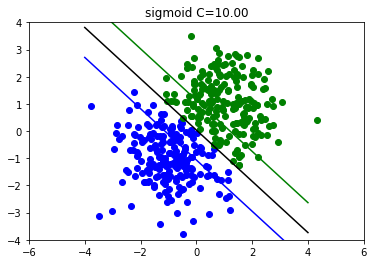

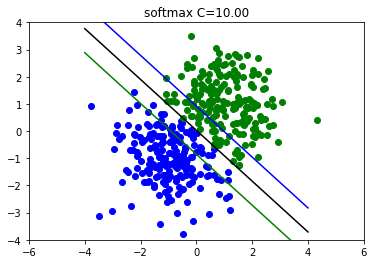

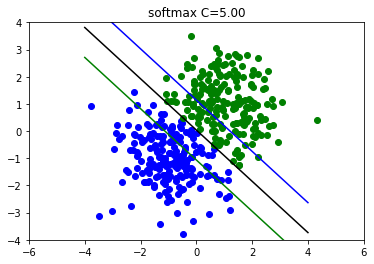

ceof
sigmoid C=10.00 [0.85628878 0.90776379]
softmax C=10.00 [1.05665485 1.13000136]
softmax C=05.00 [0.85626454 0.90779363]


In [9]:
X,y=gen_data([[-2,0],[+2,0]])

lr1=LogisticRegression(C=10)
plot(lr1)

lr2=LogisticRegression(multi_class='multinomial',C=10)
plot(lr2)

lr3=LogisticRegression(multi_class='multinomial',C=5)
plot(lr3)

print("ceof")
print("sigmoid C=%05.2f"%lr1.C, lr1.coef_.reshape(-1))
print("softmax C=%05.2f"%lr2.C, lr2.coef_[1] - lr2.coef_[0])
print("softmax C=%05.2f"%lr3.C, lr3.coef_[1] - lr3.coef_[0])

### Gradient decent coef property

In [10]:
X,y=gen_data([[-2,-2],[-2,2],[2,2],[2,-2]])
lr=LogisticRegression()
lr.fit(X,y)

print("sum of coef is zero")
print(lr.coef_.sum(axis=0))
print("sum of intercept is zero")
print(lr.intercept_.sum())

sum of coef is zero
[-1.11022302e-16 -5.55111512e-16]
sum of intercept is zero
3.0357660829594124e-17


# Benchmark and test

## Test 

### sigmoid

In [11]:
# no overflow problem
assert sigmoid(np.array([1E100])) == 1
assert sigmoid(np.array([-1E100])) == 0

C:\Users\liangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [12]:
# no overflow problem for large input
# we have some problem with -np.inf
print(sigmoid(np.array([-np.inf,-1E100,-1,0,1,1E100,np.inf])))

[0.         0.         0.26894142 0.5        0.73105858 1.
 1.        ]


C:\Users\liangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


### softmax

In [13]:
# no overflow problem for large input
print(softmax(np.array([[1,1],[0,1],[1E-100,0],[1E+100,0],[-1E+100,0]])))
# we have some problem with -np.inf
print(softmax(np.array([[np.inf,0]])))

[[0.5        0.5       ]
 [0.26894142 0.73105858]
 [0.5        0.5       ]
 [1.         0.        ]
 [0.         1.        ]]
[[nan nan]]


C:\Users\liangh\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in subtract


### Solver

[[1.25703224 0.04047447]] [-0.01199313]
[[1.25703218 0.0404742 ]] [-0.01198968]
[[-0.62851609 -0.02023711]
 [ 0.62851609  0.02023711]] [ 0.00599533 -0.00599533]


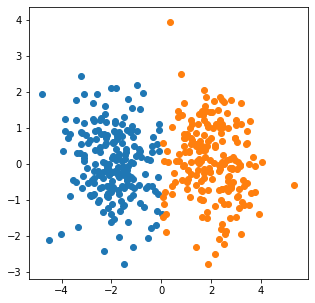

In [14]:
X,y=gen_data([[-2,0],[2,0]])    

lr=LogisticRegression(solver="BFGS", tol=1E-7,C=10)
lr.fit(X,y)
yhat=lr.predict(X)
print(lr.coef_, lr.intercept_)

lr=LogisticRegression(solver="gradient descent", tol=1E-7,C=10)
lr.fit(X,y)
yhat=lr.predict(X)
print(lr.coef_, lr.intercept_)


lr=LogisticRegression(multi_class="multinomial",solver="gradient descent", tol=1E-7,C=5)
lr.fit(X,y)
yhat=lr.predict(X)
print(lr.coef_, lr.intercept_)

plot_data(X,yhat)


## benchmark

### Tensor production

In [15]:
w=np.random.rand(1,100)
X=np.random.rand(1000,100)

#print(np.tensordot(X,w,axes=(1,1)))
#print(X.dot(w.reshape(-1)))
#print(np.einsum("ij,kj->ki",X,w))
#print(np.sum(X*w,axis=1))
%timeit X.dot(w.reshape(-1))
w_=w.reshape(-1)
%timeit X.dot(w_)
%timeit np.sum(X*w,axis=1)
%timeit np.einsum("ij,kj->i",X,w)
%timeit np.tensordot(X,w,axes=(1,1))

9.11 µs ± 425 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.05 µs ± 251 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
112 µs ± 288 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
49.1 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
27.6 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### sigmoid and softmax for binary problem

In [16]:
X,y=gen_data([[-2,0],[2,0]])

print("softmax")
%timeit LogisticRegression(multi_class='multinomial').fit(X,y)
print("sigmoid gradient descent")
%timeit LogisticRegression(solver="gradient descent").fit(X,y)
print("sigmoid BFGS")
%timeit LogisticRegression(solver="BFGS").fit(X,y)


softmax
28.9 ms ± 537 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
sigmoid gradient descent
15.7 ms ± 420 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
sigmoid BFGS
1.48 ms ± 77.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Enable `numba`

[[1.26012391 0.00467806]] [-0.01823348]
[[1.26012391 0.00467806]] [-0.01823348]
[[1.26009704 0.00459916]] [-0.01865567]
[[1.26009704 0.00459916]] [-0.01865567]


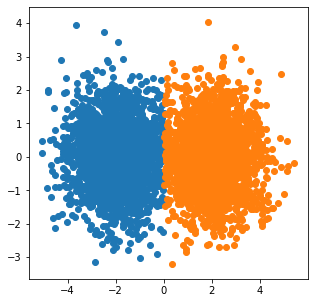

sigmoid
52.4 ms ± 1.81 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
33.9 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.05 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
X,y=gen_data([[-2,0],[2,0]],2000)

lr=LogisticRegression(solver="gradient descent",use_numba=False, tol=1E-5)
lr.fit(X,y)
print(lr.coef_, lr.intercept_)

lr=LogisticRegression(solver="gradient descent",use_numba=True, tol=1E-5)
lr.fit(X,y)
print(lr.coef_, lr.intercept_)

lr=LogisticRegression(solver="BFGS",use_numba=False, tol=1E-5)
lr.fit(X,y)
print(lr.coef_, lr.intercept_)

lr=LogisticRegression(solver="BFGS",use_numba=True, tol=1E-5)
lr.fit(X,y)

print(lr.coef_, lr.intercept_)
yhat=lr.predict(X)
plot_data(X,yhat)


print("sigmoid")
import numba as nb
#optimize_wb_sigmoid_BFGS=nb.jit(nopython=True)(optimize_wb_sigmoid_BFGS)

%timeit LogisticRegression(solver="gradient descent",use_numba=False).fit(X,y)
%timeit LogisticRegression(solver="gradient descent",use_numba=True).fit(X,y)
%timeit LogisticRegression(solver="BFGS",use_numba=False).fit(X,y)
%timeit LogisticRegression(solver="BFGS",use_numba=True).fit(X,y)